In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

## Data Cleaning

In [6]:
data = pd.read_csv('dataset (1).csv')
data.columns = [i for i in range(data.shape[1])]
data = data.rename(columns={63: 'Symbol'})
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Symbol
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ain
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ain
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ain
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ain
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,zay
54044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,zay
54045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,zay
54046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,zay


In [7]:
print("dataset shape =", data.shape)

dataset shape = (54048, 64)


In [8]:
data.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
59        0
60        0
61        0
62        0
Symbol    0
Length: 64, dtype: int64

In [9]:
# removing null values from our dataset

null_values = data[data.iloc[:, 0] == 0]
print("Number of null values =", len(null_values.index))

Number of null values = 51927


In [10]:
# dropping those null values from our dataset

data.drop(null_values.index, inplace=True)

In [11]:
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Symbol
121,0.557349,0.708191,-4.539561e-07,0.539244,0.611875,-0.005952,0.456756,0.525837,-0.033314,0.355065,...,0.332664,0.656907,-0.154261,0.356434,0.667619,-0.142152,0.400033,0.677143,-0.133311,ain
122,0.555279,0.719252,-4.130101e-07,0.527706,0.622102,-0.003218,0.434718,0.539354,-0.028686,0.330961,...,0.333927,0.672224,-0.141886,0.364116,0.685696,-0.127228,0.411288,0.692896,-0.116840,ain
124,0.535030,0.705943,-3.055433e-07,0.513450,0.614106,-0.009684,0.430532,0.530033,-0.037202,0.334935,...,0.312647,0.669892,-0.141550,0.331752,0.681123,-0.129588,0.374391,0.688143,-0.120236,ain
125,0.530871,0.735866,-4.204541e-07,0.514752,0.633106,-0.011690,0.437553,0.534318,-0.038582,0.341903,...,0.314791,0.676472,-0.143518,0.325206,0.676651,-0.130068,0.366282,0.677807,-0.117356,ain
142,0.530878,0.736985,-6.310277e-07,0.519037,0.623354,-0.000500,0.437352,0.533740,-0.022901,0.332799,...,0.305681,0.640724,-0.121009,0.330935,0.648626,-0.109231,0.373163,0.654859,-0.100667,ain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53712,0.602778,0.693694,2.410657e-07,0.536700,0.630010,-0.006737,0.499402,0.547429,-0.017487,0.476678,...,0.556306,0.495348,-0.092319,0.539204,0.528691,-0.086140,0.551906,0.555930,-0.074357,zay
53713,0.620560,0.634449,-4.523803e-07,0.550417,0.562686,-0.001878,0.514595,0.490368,-0.015272,0.494380,...,0.544895,0.487998,-0.118536,0.539178,0.521487,-0.108154,0.561456,0.543911,-0.093709,zay
53760,0.521395,0.729276,-2.634507e-07,0.484673,0.675008,-0.015949,0.451468,0.608544,-0.034838,0.413014,...,0.382947,0.617619,-0.120385,0.333522,0.605371,-0.128299,0.298957,0.597451,-0.130980,zay
53782,0.522801,0.768502,-2.123496e-07,0.434778,0.713424,-0.019650,0.381631,0.649394,-0.043241,0.340297,...,0.448272,0.606561,-0.113218,0.399211,0.606551,-0.107526,0.370032,0.608490,-0.097097,zay


In [12]:
print("dataset shape =", data.shape)

dataset shape = (2121, 64)


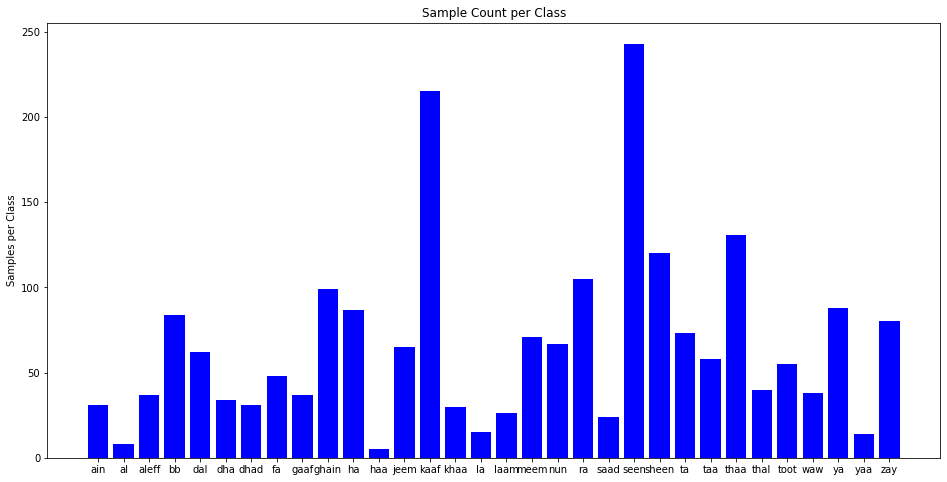

In [13]:
samples = data.Symbol.value_counts().sort_index()
x_pos = [i for i in range(len(samples.index))]
plt.figure(figsize=(16, 8))
plt.bar(x_pos, samples, color='b')
plt.xticks(x_pos, samples.index)
plt.ylabel('Samples per Class')
plt.title('Sample Count per Class')

plt.show()

## Data Preparation

In [15]:
X = data.iloc[:, :-1]
print("X shape =", X.shape)

Y = data.iloc[:, -1]
print("Y shape =", Y.shape)

X shape = (2121, 63)
Y shape = (2121,)


## Data Split

In [256]:
#Train 80% test 20%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Model Classifcation

In [275]:
#SVM (Linear kernel)
svm = SVC(C=100, gamma=0.1, kernel='linear')
svm.fit(x_train, y_train)
print("Training score=", svm.score(x_train, y_train))
y_pred = svm.predict(x_test)
AC=accuracy_score(y_test,y_pred)
print("Accuracy 'Linear' = {:.2f}%".format(AC*100))

Training score= 0.9775943396226415
Accuracy 'Linear' = 92.24%


In [276]:
#SVM (rbf kernel)
svm2 = SVC(C=100, gamma=0.1, kernel='rbf')
svm2.fit(x_train, y_train)
print("Training score=", svm2.score(x_train, y_train))
y_pred2 = svm2.predict(x_test)
AC=accuracy_score(y_test,y_pred2)
print("Accuracy 'rbf' = {:.2f}%".format(AC*100))

Training score= 0.9663915094339622
Accuracy 'rbf' = 91.53%


In [277]:
# View confusion matrix for test data and predictions
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[ 8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0  0  0  0  0  0  0]
 [ 0  0  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  1  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  2  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 11  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 

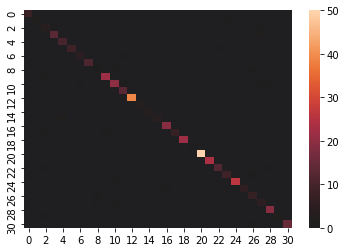

In [278]:
sns.heatmap(cm, center = True)
plt.show()

In [279]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ain       1.00      1.00      1.00         8
          al       1.00      0.67      0.80         3
       aleff       0.50      0.67      0.57         6
          bb       0.81      0.87      0.84        15
         dal       0.83      1.00      0.91        10
         dha       1.00      0.90      0.95        10
        dhad       0.71      0.83      0.77         6
          fa       1.00      0.92      0.96        12
        gaaf       0.25      0.33      0.29         3
       ghain       0.96      0.96      0.96        23
          ha       0.87      0.83      0.85        24
        jeem       0.87      1.00      0.93        13
        kaaf       1.00      1.00      1.00        39
        khaa       1.00      1.00      1.00         3
          la       1.00      1.00      1.00         4
        laam       1.00      0.57      0.73         7
        meem       0.95      1.00      0.97        19
         nun       0.88    

In [280]:
result = pd.DataFrame({'original' : y_test,'predicted' : y_pred})
result.head(20)

,original,predicted
30749,meem,meem
6829,bb,bb
22039,jeem,jeem
18623,ha,ha
23357,kaaf,kaaf
7087,dal,dal
37424,seen,seen
13460,fa,fa
30241,meem,meem
22033,jeem,jeem


In [281]:
joblib.dump(svm, 'ARL_Model.pkl')

['ARL_Model.pkl']